## Análise Exploratória de Dados

#### 1 - Importando os dados

Link do Dataset: [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 39)

In [2]:
arquivo = 'https://raw.githubusercontent.com/ryanrodr/eda-jobs-in-data/main/dados/jobs_in_data.csv'
df = pd.read_csv(arquivo)

In [3]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

9355 linhas e 12 colunas


In [4]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### 2 - Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number) ou dados duplicados.

In [5]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.duplicated().sum()

4014

- Removendo dados duplicados e resetando o índice

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


- Removendo colunas que não vão ser utilizadas

In [9]:
df.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

- Convertendo o tipo de dado das colunas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         5341 non-null   int64 
 1   job_title         5341 non-null   object
 2   job_category      5341 non-null   object
 3   salary_in_usd     5341 non-null   int64 
 4   experience_level  5341 non-null   object
 5   employment_type   5341 non-null   object
 6   work_setting      5341 non-null   object
 7   company_size      5341 non-null   object
dtypes: int64(2), object(6)
memory usage: 375.5+ KB


- Identificando as colunas categóricas que contenham menos de 10 valores únicos e contenham o tipo de dado 'object'

In [11]:
limite = 10

colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite and df[col].dtype == 'object']

In [12]:
colunas_categoricas

['job_category',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_size']

- Alterando o tipo de dado para 'category'

In [13]:
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         5341 non-null   int64   
 1   job_title         5341 non-null   object  
 2   job_category      5341 non-null   category
 3   salary_in_usd     5341 non-null   int64   
 4   experience_level  5341 non-null   category
 5   employment_type   5341 non-null   category
 6   work_setting      5341 non-null   category
 7   company_size      5341 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 194.0+ KB


#### 3 - Resumindo os dados

In [15]:
df.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


In [16]:
quantidade_categoria = df['job_category'].value_counts()
percentual_categoria = df['job_category'].value_counts(normalize=True) * 100

tabela_categoria = pd.DataFrame({'Quantidade': quantidade_categoria,
                                 'Porcentagem (%)': percentual_categoria})

tabela_categoria = tabela_categoria.reset_index().rename(columns={'job_category': 'Categoria'})

In [17]:
# Formatando e centralizando a tabela dinâmica
tabela_categoria.style.set_properties(**{'text-align': 'center'})

,index,Quantidade,Porcentagem (%)
0,Data Science and Research,1655,30.986707
1,Data Engineering,1160,21.718779
2,Machine Learning and AI,917,17.169069
3,Data Analysis,809,15.146976
4,Leadership and Management,351,6.571803
5,BI and Visualization,188,3.519940
6,Data Architecture and Modeling,162,3.033140
7,Data Management and Strategy,49,0.917431
8,Data Quality and Operations,45,0.842539
9,Cloud and Database,5,0.093615


In [18]:
quantidade_exp = df['experience_level'].value_counts()
percentual_exp = df['experience_level'].value_counts(normalize=True) * 100

tabela_exp = pd.DataFrame({'Quantidade': quantidade_exp, 'Porcentagem (%)': percentual_exp})
tabela_exp = tabela_exp.reset_index().rename(columns={'experience_level': 'Experiência'})

In [19]:
tabela_exp

,index,Quantidade,Porcentagem (%)
0,Senior,3444,64.482307
1,Mid-level,1274,23.853211
2,Entry-level,400,7.489234
3,Executive,223,4.175248


- Exibindo os resultados em subplots com matplotlib

KeyError: 'Categoria'

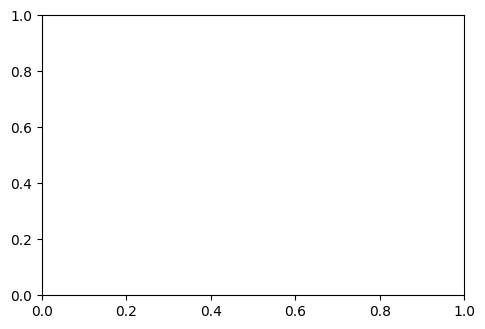

In [20]:
plt.figure(figsize=(12, 8)) # Definindo o tamanho da imagem

plt.subplot(2, 2, 1)
plt.barh(tabela_categoria['Categoria'], tabela_categoria['Quantidade'], color='grey')
for i, quantidade in enumerate(tabela_categoria['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade por área de atuação em Ciência de Dados')
plt.xlim(0, 1900)

plt.subplot(2, 2, 2)
plt.barh(tabela_exp['Experiência'], tabela_exp['Quantidade'], color='grey')
for i, quantidade in enumerate(tabela_exp['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade pelo nível de experiência')
plt.xlim(0, 3900)

plt.tight_layout() # Ajustando o tamanho

#### 4 - Operações de grupo e visualizações

- Utilizando `groupby` para agrupar os dados

In [ ]:
# Resumindo os dados pelo ano, categoria e contando o número de ocorrências
group = df.groupby(['work_year', 'job_category']).size().reset_index(name='Quantidade')

- Reformatando os dados e transformando em uma Tabela Dinâmica com `pivot_table`
- Utilizando a Tabela como base e gerando um gráfico de barras horizontais

In [ ]:
# Preenchendo os valores ausentes com fillna e transformando em inteiros
categoria_ano = group.pivot_table(index='job_category', columns='work_year').fillna(0).astype(int)

# Acrescentando Totais Gerais na tabela e ordenando os dados
categoria_ano['Total'] = categoria_ano.sum(axis=1)
categoria_ano = categoria_ano.sort_values(by='Total', ascending=False)

In [ ]:
# Formatando e centralizando a tabela dinâmica
categoria_ano.style.set_properties(**{'text-align': 'center'})

In [ ]:
# Removendo a coluna de Total para plotar o gráfico
categoria_ano = categoria_ano.drop('Total', axis=1)

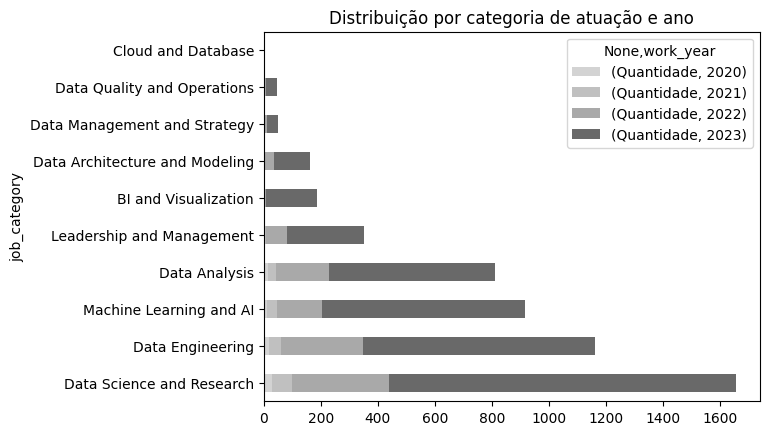

In [ ]:
# Definindo as cores a serem usadas
cores = ['lightgray', 'silver', 'darkgray', 'dimgray']

# Plotando um gráfico de barras empilhadas
categoria_ano.plot.barh(stacked=True, color=cores)
plt.title('Distribuição por categoria de atuação e ano')
plt.show()

#### 5 - Distribuição das vagas por categoria e nível de experiência

In [ ]:
# Resumindo os dados pela categoria, nível de experiência e contando o número de ocorrências
group2 = df.groupby(['job_category', 'experience_level']).size().reset_index(name='quantidade')

In [ ]:
group2.tail(2)

,job_category,experience_level,quantidade
38,Machine Learning and AI,Mid-level,201
39,Machine Learning and AI,Senior,639


In [ ]:
# Transformando os dados com pivot_table
categoria_exp = group2.pivot_table(index='job_category', columns='experience_level')

# Somando os totais das linhas para transformar em percentual
soma_linhas = categoria_exp.sum(axis=1)
categoria_exp = (categoria_exp.div(soma_linhas, axis=0) * 100)

In [ ]:
# Formatando e centralizando a tabela dinâmica
categoria_exp.style.set_properties(**{'text-align': 'center'})

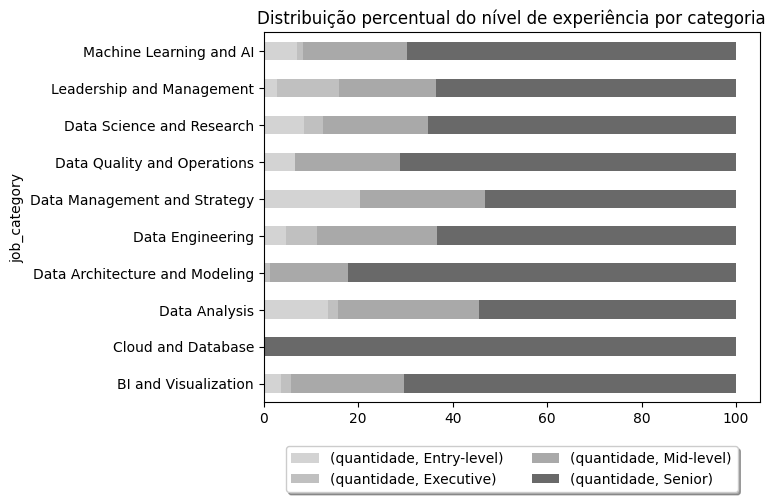

In [ ]:
categoria_exp.plot.barh(stacked=True, color=cores)
plt.title('Distribuição percentual do nível de experiência por categoria')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

#### 6 - Média salarial anual por categoria / título / nível de experiência
- Quantidade de vagas e média salarial anual por categoria de trabalho em Data Science

In [ ]:
# Agrupando os dados por categoria e realizando cálculos com agg
media_categoria = df.groupby(['job_category']).agg({'job_category': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_categoria = media_categoria.rename(columns={'job_category': 'Quantidade', 'salary_in_usd': 'Média Anual'})

# Ordenando os dados pela médial salarial anual
media_categoria = media_categoria.sort_values(by='Média Anual', ascending=False)

In [ ]:
# Centralizando e formatando a tabela
media_categoria.style.set_properties(**{'text-align': 'center'})

,Quantidade,Média Anual
job_category,,
Machine Learning and AI,917,170453.221374
Data Science and Research,1655,157131.039879
Data Architecture and Modeling,162,157054.006173
Cloud and Database,5,155000.000000
Leadership and Management,351,149020.108262
Data Engineering,1160,142967.543103
BI and Visualization,188,128377.734043
Data Management and Strategy,49,107655.836735
Data Analysis,809,106707.058096


In [ ]:
# Agrupando os dados por titulo e realizando cálculos com agg
media_titulo = df.groupby(['job_title']).agg({'job_title': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_titulo = media_titulo.rename(columns={'job_title': 'Quantidade', 'salary_in_usd': 'Média Anual'})

# Ordenando os dados pela médial salarial anual e quantidade
media_titulo = media_titulo.sort_values(by=['Média Anual', 'Quantidade'], ascending=[False, True])

- Top 10 vagas com a maior média salarial anual e mais vagas disponíveis

In [ ]:
media_titulo.head(10)

,Quantidade,Média Anual
job_title,,
Analytics Engineering Manager,1,399880.000000
Data Science Tech Lead,1,375000.000000
Managing Director Data Science,1,300000.000000
Head of Machine Learning,2,259000.000000
AWS Data Architect,1,258000.000000
Cloud Data Architect,1,250000.000000
AI Architect,6,233656.000000
Director of Data Science,27,215447.629630
Machine Learning Software Engineer,13,212907.692308


In [51]:
tabela_experiencia = pd.crosstab(df['job_title'],
                                df['experience_level'],
                                aggfunc='mean',
                                values=df['salary_in_usd']).fillna(0)

In [52]:
tabela_experiencia

experience_level,Entry-level,Executive,Mid-level,Senior
job_title,,,,
AI Architect,0.00,215936.0,0.000000,237200.000000
AI Developer,110119.50,0.0,138294.333333,162770.666667
AI Engineer,28296.50,0.0,163261.100000,192572.681818
AI Programmer,56021.75,0.0,0.000000,120000.000000
AI Research Engineer,30940.00,0.0,115603.000000,0.000000
...,...,...,...,...
Sales Data Analyst,0.00,0.0,60000.000000,0.000000
Software Data Engineer,0.00,0.0,74883.000000,130000.000000
Staff Data Analyst,44753.00,15000.0,179998.000000,0.000000
